In [147]:
import numpy as np
import astropy.io.fits as fits
from astropy.utils.data import get_pkg_data_filename
import matplotlib.pyplot as plt

debug = 1

In [148]:
def import_FITS_image(filename):
    """Import FITS image from file"""
    image_file = get_pkg_data_filename(filename)
    image_data = fits.getdata(image_file, ext=0)
    if debug:
        print(fits.info(image_file))
        print(image_data.shape)
        plt.title(filename)
        plt.imshow(image_data, cmap='gray')
        plt.colorbar()
        plt.show()
        plt.title("Histogram")
        plt.hist(image_data.flatten(), bins=100)
        plt.show()
    return np.array(image_data).astype(np.int32)

def split_image(image):
    """Split image into 2 halves"""
    y, x = image.shape
    x = int(x/2)
    q1 = image[:y, :x]
    q2 = image[y:, :x]
    if debug:
        print("split image shape")
        print(q1.shape)
        print(q2.shape)
    return q1, q2

def crop_image(image, x, y, w, h):
    """Crop image to specified width and height"""
    return image[y:y+h, x:x+w]

In [149]:
def get_2d_array_variance(array):
    """Get 2D array variance"""
    result = np.var(array)/2
    if debug > 1:
        print("variance shape: {}".format(str(result)))
    return result

def get_2d_array_mean(array):
    """Get 2D array mean"""
    result = np.average(array)
    if debug > 1:
        print("mean shape: {}".format(str(result)))
    return result

def get_2d_array_difference(array1, array2):
    """Get 2D array difference"""
    result = np.subtract(array1, array2)
    if debug > 1:
        print("difference shape: {}".format(str(result.shape)))
    return result

def plot_2d_array(array, title):
    """Plot 2D array"""
    plt.title(title)
    plt.imshow(array, cmap='magma')
    plt.colorbar()
    plt.show()

In [150]:
def convert_2d_array_to_windows(array, window_width, window_height):
    """Convert 2D array to windows"""
    windows = []
    for i in range(window_height, array.shape[0], window_height):
        for j in range(window_width, array.shape[1], window_width):
            windows.append(array[i-window_height:i, j-window_width:j])
    return np.array(windows)

In [151]:
def sort_arrays_together(array1, array2):
    """Sort arrays together"""
    p = array1.argsort()
    return array1[p], array2[p]

def limit_arrays_together(array1, array2, limit):
    """Limit arrays together"""
    array1_new = []
    array2_new = []
    for i in range(len(array1)):
        if array1[i] < limit:
            array1_new.append(array1[i])
            array2_new.append(array2[i])
    return np.array(array1_new), np.array(array2_new)

def moving_average(array, window_size):
    """Moving average"""
    return np.convolve(array, np.ones(window_size), 'valid') / window_size

def plot_mean_variance(mean, variance, smooth=0):
    """Plot mean and variance"""
    mean, variance = sort_arrays_together(mean, variance)
    if smooth:
        variance = moving_average(variance, smooth)
        mean = mean[smooth//2:smooth//2+len(variance)]
        plt.plot(mean, variance)
    else:
        plt.plot(mean, variance, 'x')
    plt.xlabel('Mean')
    plt.ylabel('Variance')
    plt.suptitle('Mean-Variance Plot')
    if smooth:
        plt.title('Smoothed with window size {}'.format(smooth))
    plt.show()

Filename: temp_4196x4096_73.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   (4196, 4096)   int16 (rescales to uint16)   
None
(4096, 4196)


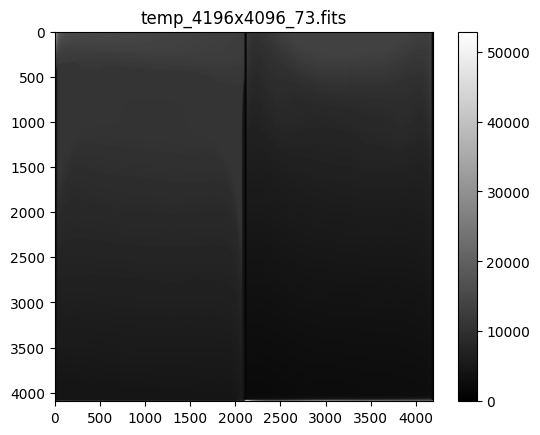

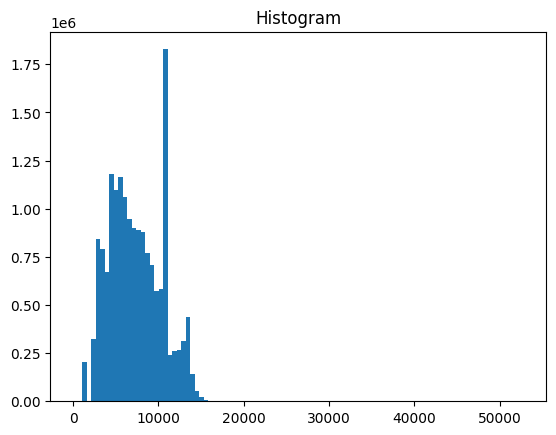

Filename: temp_4196x4096_74.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   (4196, 4096)   int16 (rescales to uint16)   
None
(4096, 4196)


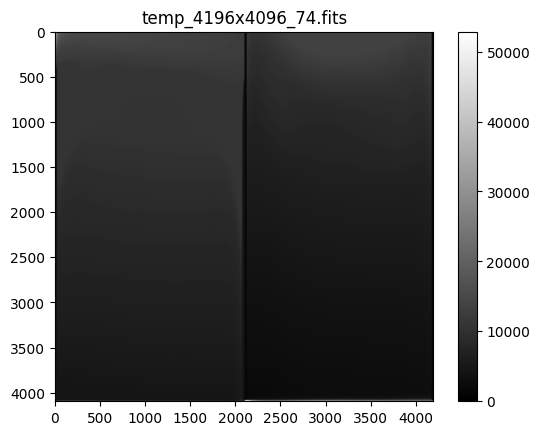

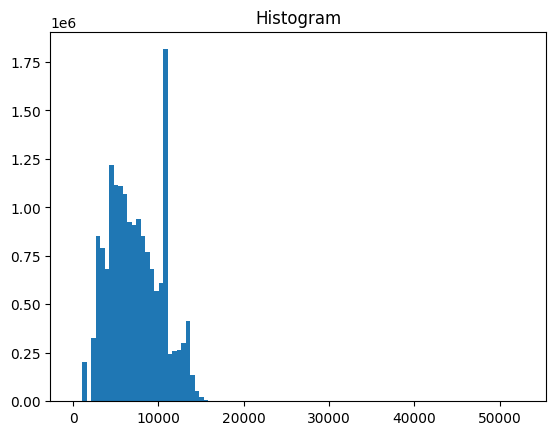

split image shape
(4096, 2098)
(0, 2098)
split image shape
(4096, 2098)
(0, 2098)


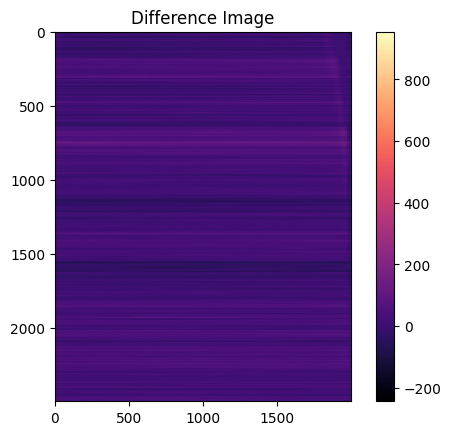

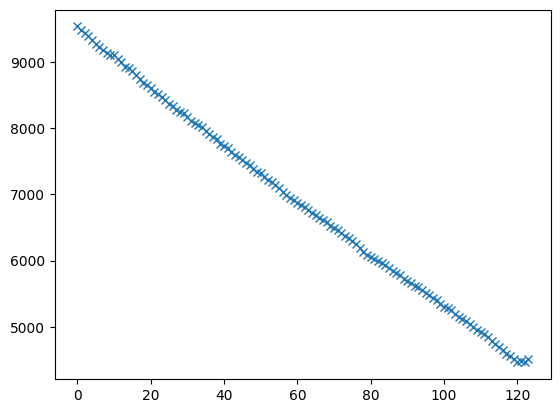

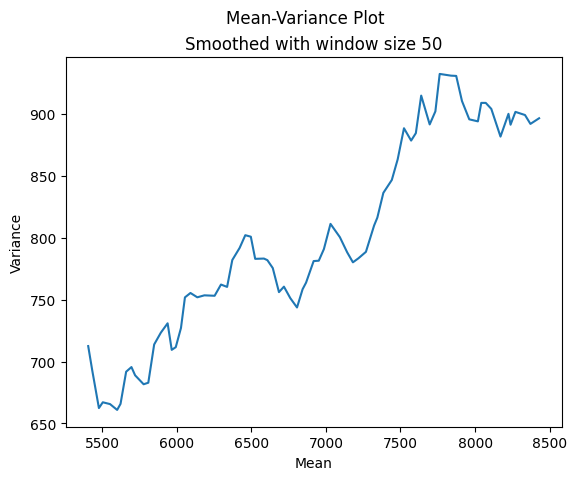

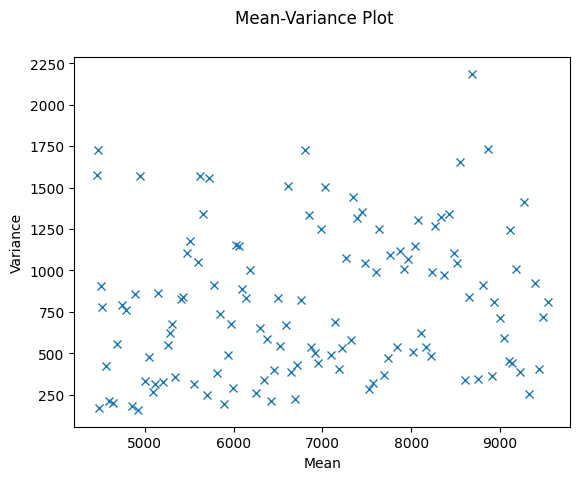

In [157]:
filename1 = 'temp_4196x4096_73.fits'
filename2 = 'temp_4196x4096_74.fits'
image1 = import_FITS_image(filename1)
image2 = import_FITS_image(filename2)
image1 = split_image(image1)[0]
image2 = split_image(image2)[0]
border = 100
image1 = crop_image(image1, border, border+1500, image1.shape[1]-border, image1.shape[0]-border)
image2 = crop_image(image2, border, border+1500, image2.shape[1]-border, image2.shape[0]-border)
window_width = image1.shape[1]-1
window_height = 20

image1_windows = convert_2d_array_to_windows(image1, window_width, window_height)
image2_windows = convert_2d_array_to_windows(image2, window_width, window_height)
imagediff_windows = convert_2d_array_to_windows(get_2d_array_difference(image1, image2), window_width, window_height)
plot_2d_array(get_2d_array_difference(image1, image2), "Difference Image")
image1_windows_mean = np.array([get_2d_array_mean(window) for window in image1_windows])
imagediff_variance = np.array([get_2d_array_variance(window) for window in imagediff_windows])

plt.plot(image1_windows_mean, 'x')
plt.show()

mean, diff = limit_arrays_together(image1_windows_mean, imagediff_variance, 10500)
plot_mean_variance(mean, diff, smooth=50)
plot_mean_variance(mean, diff, smooth=0)


In [ ]:
filename1 = 'temp_4196x4096_119.fits'
filename2 = 'temp_4196x4096_120.fits'
image1 = import_FITS_image(filename1)
image2 = import_FITS_image(filename2)
image1 = split_image(image1)[1]
image2 = split_image(image2)[1]
border = 100
image1 = crop_image(image1, border, border, image1.shape[1]-border, image1.shape[0]-border)
image2 = crop_image(image2, border, border, image2.shape[1]-border, image2.shape[0]-border)
window_width = image1.shape[1]-1
window_height = 10
image1_windows = convert_2d_array_to_windows(image1, window_width, window_height)
image2_windows = convert_2d_array_to_windows(image2, window_width, window_height)
imagediff_windows = convert_2d_array_to_windows(get_2d_array_difference(image1, image2), window_width, window_height)
plot_2d_array(get_2d_array_difference(image1, image2), "Difference Image")
image1_windows_mean = np.array([get_2d_array_mean(window) for window in image1_windows])
imagediff_variance = np.array([get_2d_array_variance(window) for window in imagediff_windows])

mean, diff = limit_arrays_together(image1_windows_mean, imagediff_variance, 10500)
plot_mean_variance(mean, diff, smooth=50)
plot_mean_variance(mean, diff, smooth=0)